**PROJECT NAME :** *Stock price Prediction*

This project uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the stock prices of an organisation. In this project Past performance of the organisation is considered as the data for performing future predictions. *So lets start coding.*

Lets first import all the required functions we need

In [ ]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
plt.style.use('fivethirtyeight')
#setting the Time step 
trainingwithnumber=200 
#if the number is changed from 200, please consider training the model again for each company

!pip install pyyaml h5py  # Required to save models in HDF5 format

By changing the number assigned to the variable 'trainingwithnumber' we can change the data that we use to predict the data using the model 'LSTM'.

In [ ]:
def create_model():
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape = (trainingwithnumber,1)))
  model.add(LSTM(50, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mean_squared_error')
  return model
# Changing the layers in this snippet will affect the trained model.
# So please consider retraining the model again for better results

List of some companies is mentioned below. 

Please use their code name in the next python code snippet. The listed companies datas are already trained. If  company name which is not listed is entered in the next snippet, then please consider training the model in the Building LSTM model snippets coded further in this file.

AAPL : Apple
 
GOOG : Google
 
SLNO : Soleno Therapeutics Inc
 
PTI : Proteostasis Therapeutics Inc
 
LCTX : Lineage Cell Therapeutics Inc
 
CLPS : CLPS Inc
 
AGTC : Applied Genetic Technologies Corp
 
SAVA : Cassava Sciences Inc
 
BB : Blackberry
 
HSDT : Helius Medical Technologies Inc
 
CTXR : Citius Pharmaceuticals Inc
 
ISCNF : Isracann Biosciences Inc
 
LAIX : LAIX Inc
 
MRNS : Marinus Pharmaceuticals Inc
 
DRRX : DURECT Corporation
 
CANF : Can Fite Biopharma ADR Representing 30 Ord Shs
 
CBKC : Christopher & Banks Corporation
 
GSAT : Globalstar, Inc
 
CYDY : CytoDyn Inc
 
MRSN : Mersana Therapeutics Inc

In [ ]:
company = input("Enter the company code:")
print(company)

Enter the company code:BTC-INR
BTC-INR


In [ ]:
company_list = ['AAPL','GOOG','SLNO','PTI','LCTX','CLPS','AGTC','SAVA','BB','HSDT','CTXR','ISCNF','LAIX','MRNS','DRRX','CANF','CBKC','GSAT','CYDY','MRSN']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now lets get the stock Quote (stocks data of organisation of the company code entered).

In [ ]:
df = web.DataReader(company,data_source='yahoo',start='2012-01-01', end='2020-12-26')

17 is taken as end date to observe the variation between real closing price and future predictions by this model.

Lets view the data loaded.

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,2.854223e+04,2.755250e+04,2.844333e+04,2.785164e+04,1282359120,2.785164e+04
2014-09-17,2.782277e+04,2.508574e+04,2.782277e+04,2.577412e+04,2093992320,2.577412e+04
2014-09-18,2.598884e+04,2.336609e+04,2.575365e+04,2.402334e+04,2307413745,2.402334e+04
2014-09-19,2.575756e+04,2.372438e+04,2.401585e+04,2.488181e+04,2243150060,2.488181e+04
2014-09-20,2.509612e+04,2.392506e+04,2.483197e+04,2.426826e+04,1617399085,2.426826e+04
...,...,...,...,...,...,...
2020-12-23,1.772905e+06,1.683869e+06,1.762756e+06,1.716141e+06,3776633515645,1.716141e+06
2020-12-24,1.748355e+06,1.678789e+06,1.716057e+06,1.745973e+06,3021824849377,1.745973e+06
2020-12-25,1.817652e+06,1.726106e+06,1.745798e+06,1.814319e+06,3094511275497,1.814319e+06


Here in this project I considered and trained many company stocks from *1st January 2010 to 17th November 2020*. Even though I have mentioned 1st jan of 2010, the data started from someother starting date because the data of the stocks is not available on those days (most likely the stock market is closed on those days or comapny is not yet listed in the stock market).

Lets analyse the data loaded using "shape".

In [ ]:
df.shape

(2294, 6)

Lets plot the closing price data to visualize the data better

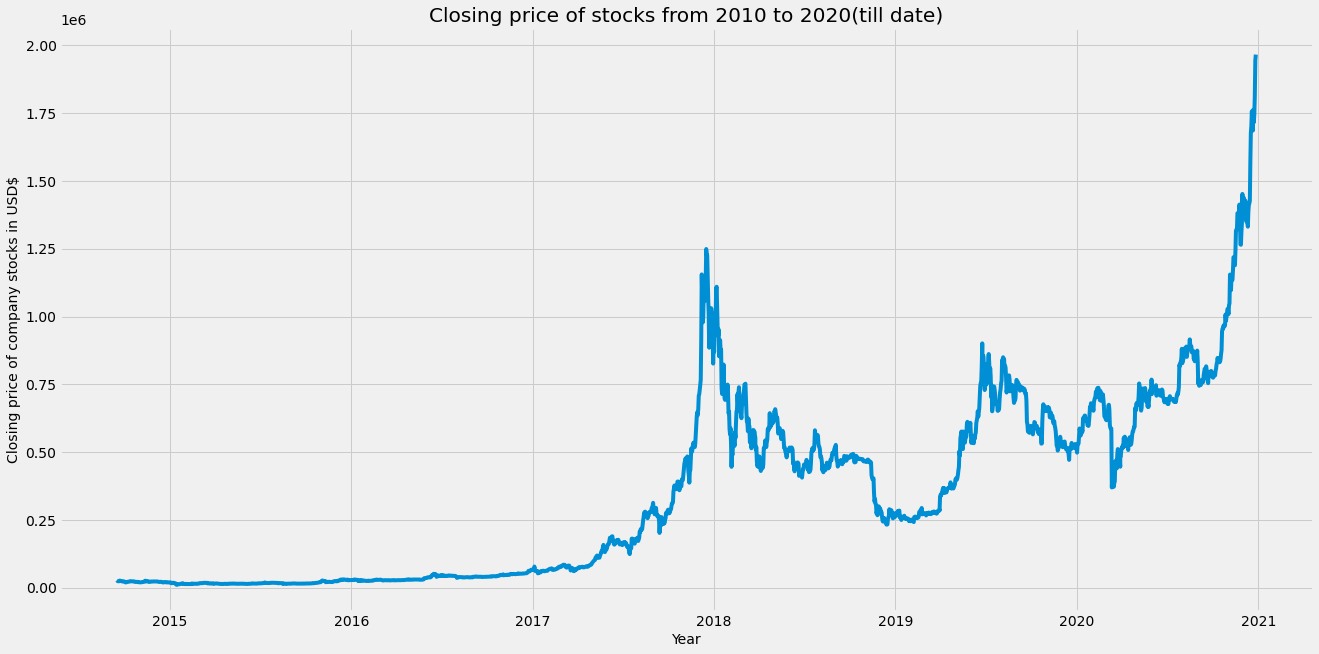

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Closing price of stocks from 2010 to 2020(till date)')
plt.plot(df['Close'])
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Closing price of company stocks in USD$',fontsize = 14)
plt.show()

Now lets create a dataframe with only values of 'Close' column in the dataloaded and convert the dataframe into numpy array.

In [ ]:
data = df.filter(['Close'])
dataset = data.values

Now lets set **80 %** as the data for training purpose

In [ ]:
training_data_length =  math.ceil(len(dataset)* 0.8)

Here I used scaling the data in between **0 and 1** because *LSTM* is sensitive to the scaling of the data.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

now lets divide training data to x_train and y_train:

In time series data (like the stock prices), the closing price of today is dependent on yesterday and closing price of tomorrow depends on yesterday and today. So we have to be careful while dividind the test-train set. The division or seperation of data has to be done in a continuous dataset manner with respect to the date (i.e., jumbling of closing price data should not be done)

In [ ]:
train_data = scaled_data[0:training_data_length,:]
x_train = []
y_train = []
 
for i in range(trainingwithnumber,len(train_data)):
  x_train.append(train_data[i-trainingwithnumber:i])
  y_train.append(train_data[i,0])

convert the train data to numpy arrays

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1636, 200, 1)

In [ ]:
test_data = scaled_data[training_data_length-trainingwithnumber:,:]
x_test=[]
y_test=dataset[training_data_length:,:]
for i in range(trainingwithnumber,len(test_data)):
  x_test.append(test_data[i-trainingwithnumber:i,0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(458, 200, 1)

Buliding the LSTM model

If the companies listed is not selected and a different company name is written the next snippet will train the model. Please consider unhashing the next snippet to save the model.

In [ ]:
if company not in company_list:
  model = create_model()
  model.fit(x_train,y_train,batch_size =1,epochs = 25)
  #!mkdir -p saved_model
  #model.save('saved_model/my_model_BB.h5')

Epoch 1/25
1636/1636 [==============================] - 23s 13ms/step - loss: 0.0018
Epoch 2/25
1636/1636 [==============================] - 20s 12ms/step - loss: 5.8932e-04
Epoch 3/25
1636/1636 [==============================] - 20s 12ms/step - loss: 3.4716e-04
Epoch 4/25
1636/1636 [==============================] - 20s 12ms/step - loss: 3.4337e-04
Epoch 5/25
1636/1636 [==============================] - 20s 12ms/step - loss: 2.8428e-04
Epoch 6/25
1636/1636 [==============================] - 20s 12ms/step - loss: 2.6490e-04
Epoch 7/25
1636/1636 [==============================] - 20s 12ms/step - loss: 1.9809e-04
Epoch 8/25
1636/1636 [==============================] - 20s 12ms/step - loss: 1.9318e-04
Epoch 9/25
1636/1636 [==============================] - 20s 12ms/step - loss: 1.6820e-04
Epoch 10/25
1636/1636 [==============================] - 20s 12ms/step - loss: 1.8535e-04
Epoch 11/25
1636/1636 [==============================] - 19s 12ms/step - loss: 1.7577e-04
Epoch 12/25
1636/1636 [

In [ ]:
# All the trained models are saved in 'saved_model'
# A folder containing all the saved models is also sent in the zip file.
# Use the files to skip training.
# I have trained these 20 companies and saved them and then reuploaded them into google drive.
# Path for the models is mentioned in the 'path' section of load_model().
 
# This snippet selects the model of the trained company from the 'saved_models' folder
 
if company == 'AAPL':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_AAPL.h5')
if company == 'GOOG':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_GOOG.h5')
if company == 'SLNO':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_SLNO.h5')
if company == 'PTI':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_PTI.h5')
if company == 'LCTX':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_LCTX.h5')
if company == 'CLPS':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_CLPS.h5')
if company == 'AGTC':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_AGTC.h5')
if company == 'SAVA':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_SAVA.h5')
if company == 'BB':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_BB.h5')
if company == 'HSDT':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_HSDT.h5')
if company == 'CTXR':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_CTXR.h5')
if company == 'ISCNF':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_ISCNF.h5')
if company == 'LAIX':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_LAIX.h5')
if company == 'MRNS':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_MRNS.h5')
if company == 'DRRX':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_DRRX.h5')
if company == 'CANF':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_CANF.h5')
if company == 'CBKC':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_CBKC.h5')
if company == 'GSAT':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_GSAT.h5')
if company == 'CYDY':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_CYDY.h5')
if company == 'MRSN':
  model = tf.keras.models.load_model('/content/drive/MyDrive/data/saved_model/my_model_MRSN.h5')

Let's start predicting the stock prices.

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

We use root mean square estimate to estimate the accuracy of the model. If rmse is close to 0 then the data predicted is close to the real values.

If rmse < 5 : the predictions are more accurate.

In [ ]:
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

47872.54612164276

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


 Plotting the predicted data

In [ ]:

train = data[:training_data_length]
valid = data[training_data_length:]
valid['predictions']= predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


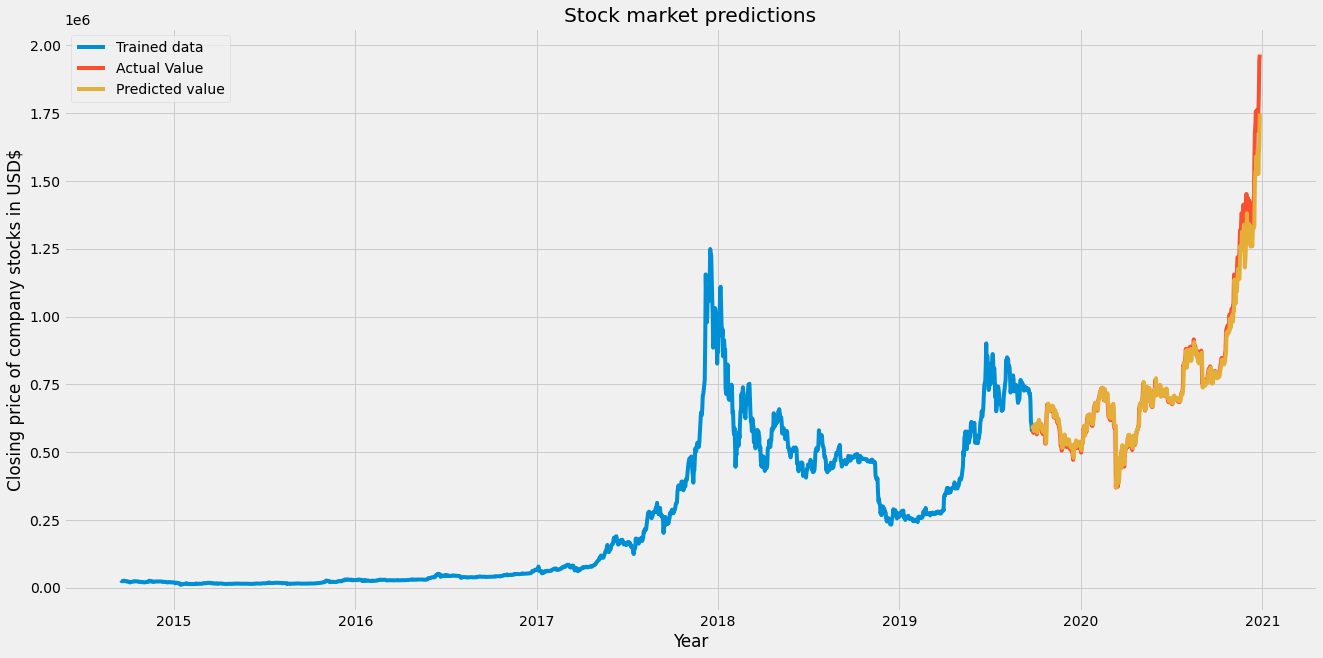

In [ ]:
#  Plotting the predicted data
plt.figure(figsize=(20,10))
plt.title('Stock market predictions')
plt.xlabel('Year')
plt.ylabel('Closing price of company stocks in USD$')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Trained data','Actual Value','Predicted value'], loc = 'lower_right')
plt.show()

Calculating the Index that was discussed in the report to support the model predictions while using the data predicted by the model by an investor. Last snippet shows the output that we are talking about

In [ ]:
# calculating the percent of times
# an investor can listen to the predictions
# for investing in the company
close_diff = []
predict_diff = []
for i in range(0,len(valid)-1):
  number_1 = valid['Close'][i+1]-valid['Close'][i]
  close_diff.append(number_1)
  number_2 = valid['predictions'][i+1]-valid['Close'][i]
  predict_diff.append(number_2)

In [ ]:
for i in range(0,len(close_diff)):
  if close_diff[i]>=0:
    close_diff[i]=1
  else:
    close_diff[i]=0
  if predict_diff[i]>=0:
    predict_diff[i] =1
  else:
    predict_diff[i]=0

In [ ]:
total=0
for i in range(0,len(close_diff)):
  if close_diff[i]==predict_diff[i]:
    total = total +1
percent = total*100/len(close_diff)
percent # The index that we are talking about

45.951859956236326

Future (10 days) Predictions

In [ ]:
# Creating new variable with past 200 days data
x_input = test_data[(len(test_data)-trainingwithnumber):].reshape(1,-1)
x_input.shape

(1, 200)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# Visit report to understand this part of the code
from numpy import array
list_output=[]
i=0
while(i<10):
  if(len(temp_input)>trainingwithnumber):
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape(1,trainingwithnumber,1)
    yhat = model.predict(x_input,verbose = 0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    list_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape(1,trainingwithnumber,1)
    yhat = model.predict(x_input,verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    list_output.extend(yhat.tolist())
    i=i+1
print(list_output)

[0.8660642]
201
1 day output [[0.74556756]]
2 day output [[0.6812521]]
3 day output [[0.6431773]]
4 day output [[0.61905956]]
5 day output [[0.5983037]]
6 day output [[0.5778056]]
7 day output [[0.55806875]]
8 day output [[0.5400443]]
9 day output [[0.52408993]]
[[0.866064190864563], [0.7455675601959229], [0.681252121925354], [0.6431772708892822], [0.6190595626831055], [0.5983036756515503], [0.5778055787086487], [0.5580687522888184], [0.5400443077087402], [0.5240899324417114]]


In [ ]:
list_output_2 = scaler.inverse_transform(list_output)
list_output=np.array(scaler.inverse_transform(list_output))

for value in list_output:
  if value <0:
    value =0
# using this if any predicted value goes less zero it will be turned out to zero.

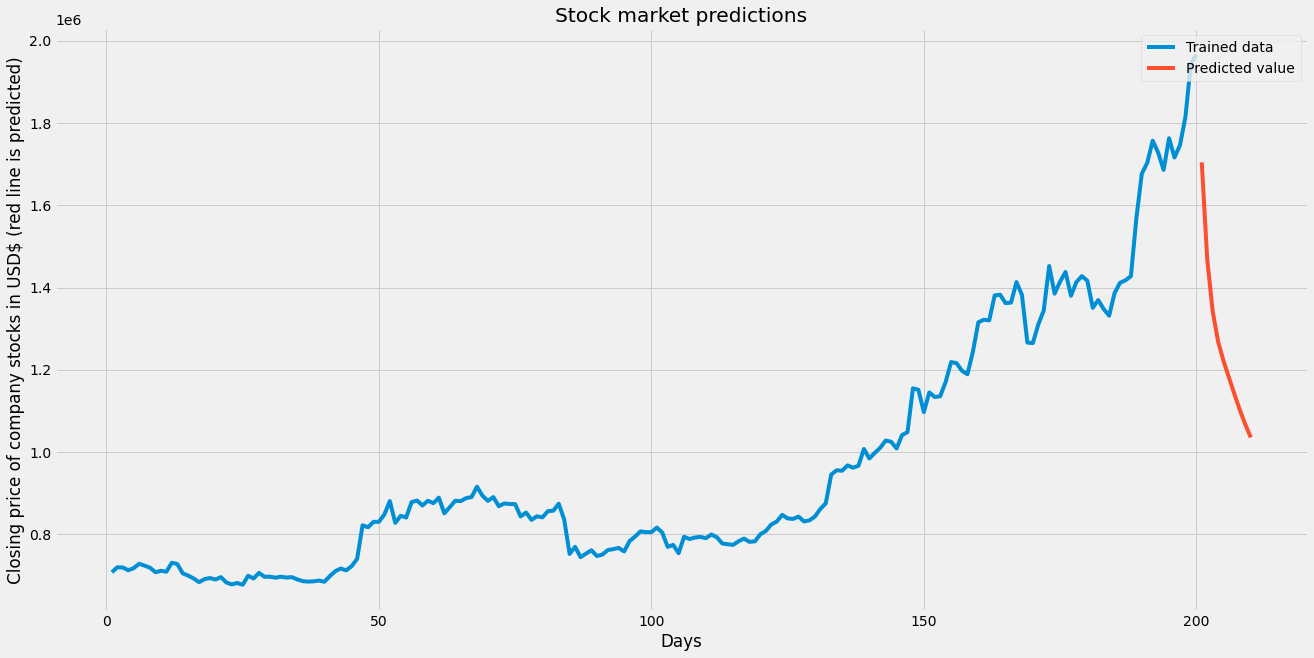

In [ ]:
#plotting the future predictions predicted by the model
day_new = np.arange(1,trainingwithnumber+1)
day_pred = np.arange(trainingwithnumber+1,trainingwithnumber+11)
df1 = df['Close']
df1 = df1.values
df2 = df1.tolist()
df2.extend(list_output)
plt.figure(figsize=(20,10))
plt.title('Stock market predictions')
plt.xlabel('Days')
plt.ylabel('Closing price of company stocks in USD$ (red line is predicted)')
 
plt.plot(day_new,df1[(len(df1)-trainingwithnumber):])
plt.plot(day_pred,list_output)
plt.legend(['Trained data','Predicted value'], loc = 'upper right')
plt.show()

# In graph day 200 is the present day and graph after that is the
# future prediction for days

Final Output that Everyone need:

In [ ]:
# The code in this snippet tells u how much u can believe
# the model for the predictions to be correct
# Check the output
i=1

print('LSTM model predicted that the value of stock on the next market day will be {}'.format(round(float(list_output[0]),3)))
if list_output[0]>valid['Close'][len(valid)-1]:
  print("=> There will be an 'Increase' in closing price")
else:
  print("=> There will be a 'Decrease' in closing price")
print('This model provides you a guarantee of " {} " percent for the direction of expected closing price outcome (i.e., Increase or Decrease)'.format(round(percent,1)))


LSTM model predicted that the value of stock on the next market day will be 1704267.353
=> There will be a 'Decrease' in closing price
This model provides you a guarantee of " 46.0 " percent for the direction of expected closing price outcome (i.e., Increase or Decrease)


In [ ]:
# This snippet is to know how
# predictions went and comparing the 
# Predictions with real data
test_company = web.DataReader(company,data_source='yahoo',start='2020-11-18', end='2020-12-02')
test_company = test_company['Close']
# predicted vs original data
print(" Lets see the diff in the predicted and real data")
for i in range(0,len(test_company)):
  print('*{}* is the actual price and *{}* is the closing price predicted'.format(round(test_company[i],3),round(float(list_output_2[i]),3)))

 Lets see the diff in the predicted and real data
*1321773.875* is the actual price and *1704267.353* is the closing price predicted
*1320301.625* is the actual price and *1468689.004* is the closing price predicted
*1381006.0* is the actual price and *1342948.353* is the closing price predicted
*1382557.375* is the actual price and *1268509.67* is the closing price predicted
*1362157.375* is the actual price and *1221358.062* is the closing price predicted
*1363430.5* is the actual price and *1180779.022* is the closing price predicted
*1413212.875* is the actual price and *1140703.978* is the closing price predicted
*1382251.625* is the actual price and *1102117.264* is the closing price predicted
*1266291.375* is the actual price and *1066878.363* is the closing price predicted
*1264934.5* is the actual price and *1035686.575* is the closing price predicted


IndexError: ignored